In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

class Modelo():
    def __init__(self):
        pass

    def CarregarDataset(self, path):
        """
        Carrega o conjunto de dados a partir de um arquivo CSV.

        Parâmetros:
        - path (str): Caminho para o arquivo CSV contendo o dataset.

        O dataset é carregado com as seguintes colunas: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm e Species.
        """
        names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=names, skiprows=[0])

    def TratamentoDeDados(self):
        """
        Realiza o pré-processamento dos dados carregados.

        Sugestões para o tratamento dos dados:
            * Utilize `self.df.head()` para visualizar as primeiras linhas e entender a estrutura.
            * Verifique a presença de valores ausentes e faça o tratamento adequado.
            * Considere remover colunas ou linhas que não são úteis para o treinamento do modelo.

        Dicas adicionais:
            * Explore gráficos e visualizações para obter insights sobre a distribuição dos dados.
            * Certifique-se de que os dados estão limpos e prontos para serem usados no treinamento do modelo.
        """
        self.df.drop([15, 32, 33, 60], axis=0, inplace=True) #exclui os outliers
        self.df.drop('PetalLengthCm', axis=1, inplace=True) #exclui a coluna PetalLengthCm (redundante)
        pass

    def Treinamento(self):
        """
        Treina o modelo de machine learning.

        Detalhes:
            * Utilize a função `train_test_split` para dividir os dados em treinamento e teste.
            * Escolha o modelo de machine learning que queira usar. Lembrando que não precisa ser SMV e Regressão linear.
            * Experimente técnicas de validação cruzada (cross-validation) para melhorar a acurácia final.

        Nota: Esta função deve ser ajustada conforme o modelo escolhido.
        """

        X = self.df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']].values
        y = self.df['Species'].values

        # Divisão da base em treinamento (80%) e teste (20%)
        cv = skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

        # retorna os índices de treino e teste
        train_index, test_index = list(cv.split(X, y) )[0]

        # retorna as partições de treino e teste de acordo com os índices
        X_train, X_test = X[train_index, :], X[test_index, :];
        Y_train, Y_test = y[train_index], y[test_index];

        # carrega o classificador
        classifier = RandomForestClassifier(max_depth=3, n_estimators=100)

        # treina o classificador com os dados de treinameto
        classifier.fit(X_train, Y_train)

        pass

    def Teste(self):
        """
        Avalia o desempenho do modelo treinado nos dados de teste.

        Esta função deve ser implementada para testar o modelo e calcular métricas de avaliação relevantes,
        como acurácia, precisão, ou outras métricas apropriadas ao tipo de problema.
        """
        # classifica os dados de teste
        Y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(Y_test, Y_pred)

        print("Acuracia geral: ", accuracy)

        print("Matriz de confusão:\n", confusion_matrix(Y_test, Y_pred), "\n")

        print("Relatório de classificação:\n", skl.metrics.classification_report(Y_test, Y_pred))


        pass

    def Train(self):
        """
        Função principal para o fluxo de treinamento do modelo.

        Este método encapsula as etapas de carregamento de dados, pré-processamento e treinamento do modelo.
        Sua tarefa é garantir que os métodos `CarregarDataset`, `TratamentoDeDados` e `Treinamento` estejam implementados corretamente.

        Notas:
            * O dataset padrão é "iris.data", mas o caminho pode ser ajustado.
            * Caso esteja executando fora do Colab e enfrente problemas com o path, use a biblioteca `os` para gerenciar caminhos de arquivos.
        """
        self.CarregarDataset("/content/iris.csv")  # Carrega o dataset especificado.

        self.TratamentoDeDados() # Tratamento de dados opcional, pode ser comentado se não for necessário

        self.Treinamento()  # Executa o treinamento do modelo

        self.Teste()

# Lembre-se de instanciar as classes após definir suas funcionalidades
# Recomenda-se criar ao menos dois modelos (e.g., Regressão Linear e SVM) para comparar o desempenho.
# A biblioteca já importa LinearRegression e SVC, mas outras escolhas de modelo são permitidas.


In [92]:
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv('/content/iris.csv', names=names, skiprows=[0])

# **TRATAMENTO DADOS**

In [46]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SepalLengthCm  151 non-null    int64 
 1   SepalWidthCm   151 non-null    int64 
 2   PetalLengthCm  151 non-null    int64 
 3   PetalWidthCm   151 non-null    int64 
 4   Species        151 non-null    object
dtypes: int64(4), object(1)
memory usage: 6.0+ KB


todos os valores sao non-null

In [48]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
import plotly.express as px
grafico = px.scatter_matrix(df, dimensions=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], color = 'Species')
grafico.show()

Setosa esta bem separada, versicolor e virginica se misturam mais...

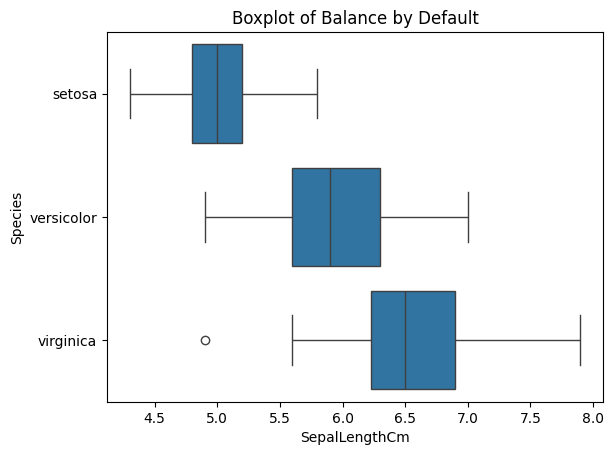

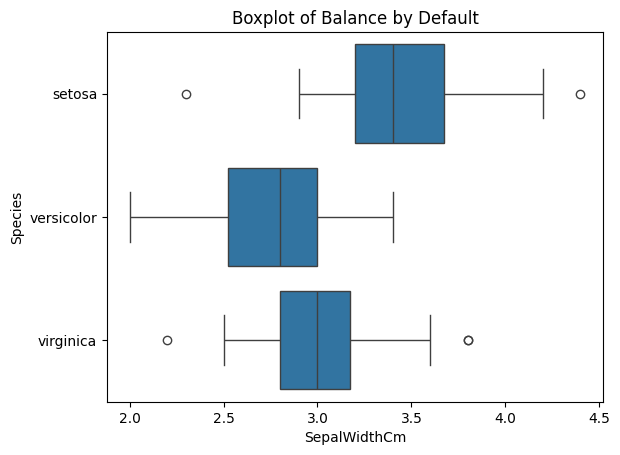

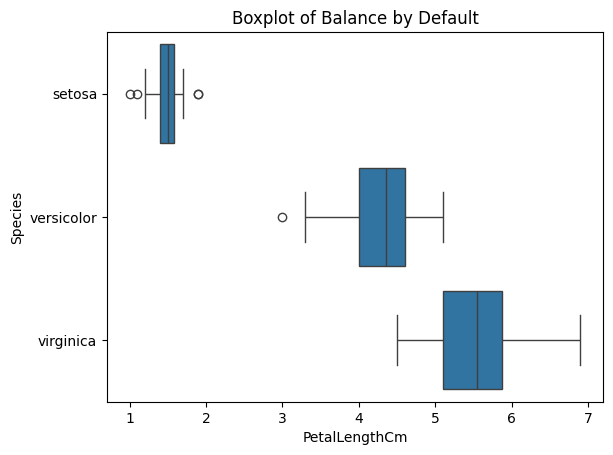

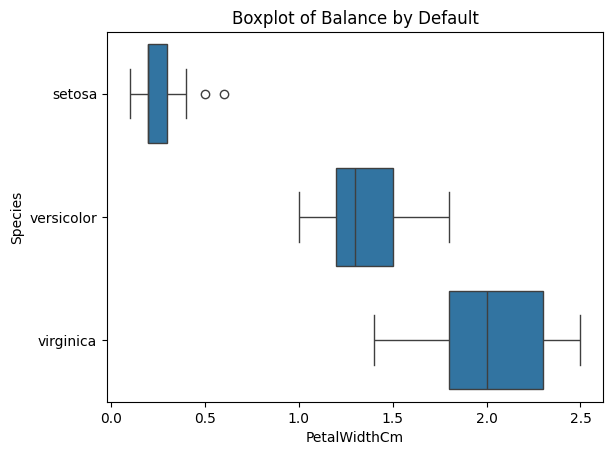

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='SepalLengthCm', y='Species', data=df)
plt.title('Boxplot of Balance by Default')
plt.xlabel('SepalLengthCm')
plt.ylabel('Species')
plt.show()

sns.boxplot(x='SepalWidthCm', y='Species', data=df)
plt.title('Boxplot of Balance by Default')
plt.xlabel('SepalWidthCm')
plt.ylabel('Species')
plt.show()

sns.boxplot(x='PetalLengthCm', y='Species', data=df)
plt.title('Boxplot of Balance by Default')
plt.xlabel('PetalLengthCm')
plt.ylabel('Species')
plt.show()

sns.boxplot(x='PetalWidthCm', y='Species', data=df)
plt.title('Boxplot of Balance by Default')
plt.xlabel('PetalWidthCm')
plt.ylabel('Species')
plt.show()

Alguns pontos outliers foram identificados, vou remove-los

In [65]:
for preditora in names[:4]:

  # Calcular os quartis Q1 e Q3
  Q1 = df[preditora].quantile(0.25)
  Q3 = df[preditora].quantile(0.75)

  # Calcular o IQR
  IQR = Q3 - Q1

  # Definir os limites inferior e superior
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Identificar outliers
  outliers = df[(df[preditora] < limite_inferior) | (df[preditora] > limite_superior)]

  print(f"{preditora} outliers:")
  print(outliers, '\n')

  #['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

SepalLengthCm outliers:
Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: [] 

SepalWidthCm outliers:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
15            5.7           4.4            1.5           0.4      setosa
32            5.2           4.1            1.5           0.1      setosa
33            5.5           4.2            1.4           0.2      setosa
60            5.0           2.0            3.5           1.0  versicolor 

PetalLengthCm outliers:
Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: [] 

PetalWidthCm outliers:
Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: [] 



Os indices 15, 32 ,33 e 60 contem outliers, vou remove-los!

In [93]:
df.drop([15, 32, 33, 60], axis=0, inplace=True)

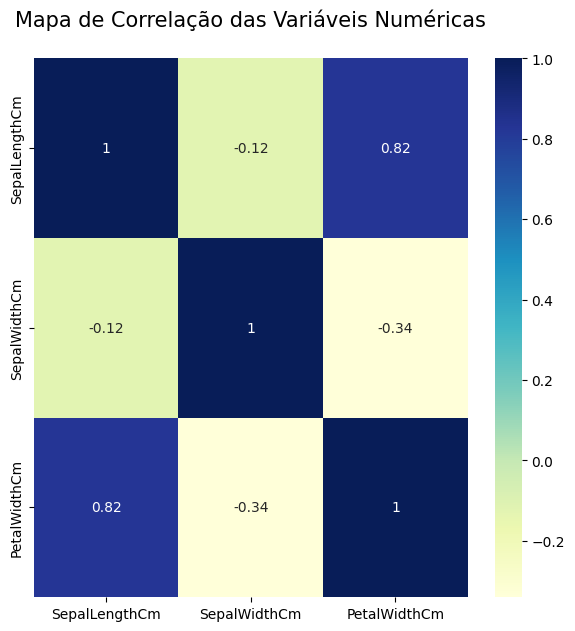

In [77]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df.drop("Species", axis = 1).corr(), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

PetallLenghtCm e PetalWidthCm tem correlacao de 0.94, poderiamos limpar uma delas para facilitar o cdg, vou remover o PetallLenghtCm pois ele tem uma relacao maior com SepalLength, o que acaba sendo a mais redundante!

In [75]:
df.drop('PetalLengthCm', axis=1, inplace=True)

In [76]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


no geral as coisas estao limpas, vou adc esses cdgs dentro do metodo TratamentoDados

# **TREINAMENTO**

In [81]:
import sklearn as skl
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']].values
y = df['Species'].values

# Divisão da base em treinamento (80%) e teste (20%)
cv = skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# retorna os índices de treino e teste
train_index, test_index = list(cv.split(X, y) )[0]

# retorna as partições de treino e teste de acordo com os índices
X_train, X_test = X[train_index, :], X[test_index, :];
Y_train, Y_test = y[train_index], y[test_index];

# carrega o classificador
classifier = skl.neighbors.KNeighborsClassifier(n_neighbors=5)

# treina o classificador com os dados de treinameto
classifier.fit(X_train, Y_train)

# classifica os dados de teste
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print(accuracy)


print("Matriz de confusão:\n", confusion_matrix(Y_test, Y_pred), "\n")

print("Relatório de classificação:\n", skl.metrics.classification_report(Y_test, Y_pred))

0.9
Matriz de confusão:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]] 

Relatório de classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



Primeiro teste com KNN

In [82]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Gerando um conjunto de dados fictício
X, y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)

# Definir os hiperparâmetros a serem ajustados para cada modelo
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Instanciar os modelos
rf = RandomForestClassifier()
svm = SVC()

# Configurar o GridSearchCV com validação cruzada para Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X, y)

# Configurar o GridSearchCV com validação cruzada para SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5)
grid_search_svm.fit(X, y)

# Exibir os melhores parâmetros para cada modelo
print(f'Melhores parâmetros (Random Forest): {grid_search_rf.best_params_}')
print(f'Melhores parâmetros (SVM): {grid_search_svm.best_params_}')

# Agora podemos comparar os dois modelos com os melhores hiperparâmetros encontrados
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_

# Aplicar validação cruzada para ambos os modelos otimizados
rf_scores = cross_val_score(best_rf, X, y, cv=5)
svm_scores = cross_val_score(best_svm, X, y, cv=5)

# Exibir os resultados
print(f'Random Forest - Acurácia Média: {rf_scores.mean():.3f}, Desvio Padrão: {rf_scores.std():.3f}')
print(f'SVM - Acurácia Média: {svm_scores.mean():.3f}, Desvio Padrão: {svm_scores.std():.3f}')


Melhores parâmetros (Random Forest): {'max_depth': 3, 'n_estimators': 100}
Melhores parâmetros (SVM): {'C': 0.1, 'kernel': 'linear'}
Random Forest - Acurácia Média: 0.940, Desvio Padrão: 0.049
SVM - Acurácia Média: 0.940, Desvio Padrão: 0.058


SVM e Random Forest com mesma acuracia, mas random com desvio menor, sera o modelo escolhido, vou adc no metodo de treinamento com os hiperparametros obtidos na validacao cruzada!

In [84]:
from sklearn.ensemble import RandomForestClassifier

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']].values
y = df['Species'].values

# Divisão da base em treinamento (80%) e teste (20%)
cv = skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# retorna os índices de treino e teste
train_index, test_index = list(cv.split(X, y) )[0]

# retorna as partições de treino e teste de acordo com os índices
X_train, X_test = X[train_index, :], X[test_index, :];
Y_train, Y_test = y[train_index], y[test_index];

# carrega o classificador
classifier = RandomForestClassifier(max_depth=3, n_estimators=100)

# treina o classificador com os dados de treinameto
classifier.fit(X_train, Y_train)

# classifica os dados de teste
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print("Acuracia geral: ", accuracy)

print("Matriz de confusão:\n", confusion_matrix(Y_test, Y_pred), "\n")

print("Relatório de classificação:\n", skl.metrics.classification_report(Y_test, Y_pred))

Acuracia geral:  0.9333333333333333
Matriz de confusão:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]] 

Relatório de classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



agora basta executar a funcao principal que ela faz tudo!

# **MAIN()**

In [97]:
model = Modelo()
model.Train()

Acuracia geral:  0.9333333333333333
Matriz de confusão:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]] 

Relatório de classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

